# **Projeto Acidentes em Rodovias Federais**

##### Notebook Destinado a limpeza de dados

In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


In [31]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
df20 = pd.read_csv("acidentes2020_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df21 = pd.read_csv("acidentes2021_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df22 = pd.read_csv("acidentes2022_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=';')
df23 = pd.read_csv("acidentes2023_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df = pd.concat([df20,df21, df22, df23], ignore_index=True)

In [33]:
print(df20.shape, end=' | ')
print(df21.shape, end=' | ')
print(df22.shape, end=' | ')
print(df23.shape, end=' | ')
print(df.shape)

(348047, 37) | (393521, 37) | (456521, 37) | (514799, 37) | (1712888, 37)


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712888 entries, 0 to 1712887
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   pesid                   float64
 2   data_inversa            object 
 3   dia_semana              object 
 4   horario                 object 
 5   uf                      object 
 6   br                      float64
 7   km                      object 
 8   municipio               object 
 9   causa_principal         object 
 10  causa_acidente          object 
 11  ordem_tipo_acidente     int64  
 12  tipo_acidente           object 
 13  classificacao_acidente  object 
 14  fase_dia                object 
 15  sentido_via             object 
 16  condicao_metereologica  object 
 17  tipo_pista              object 
 18  tracado_via             object 
 19  uso_solo                object 
 20  id_veiculo              int64  
 21  tipo_veiculo            object 

In [36]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
1,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
2,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
3,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
4,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO


In [37]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [38]:
df.describe()

,id,pesid,br,ordem_tipo_acidente,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,1.712888e+06,1.712887e+06,1.707107e+06,1.712888e+06,1.712888e+06,1.618511e+06,1.542594e+06,1.712888e+06,1.712888e+06,1.712888e+06,1.712888e+06
mean,4.291865e+05,9.465724e+05,2.146342e+02,1.688311e+00,7.314027e+05,1.923221e+03,3.915060e+01,4.055005e-01,3.454663e-01,1.278706e-01,5.134545e-02
std,9.199980e+04,1.980573e+05,1.288706e+02,9.915447e-01,2.177033e+05,4.118089e+02,3.865886e+01,4.909888e-01,4.755202e-01,3.339458e-01,2.207014e-01
min,2.600310e+05,5.784610e+05,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.490740e+05,7.782630e+05,1.040000e+02,1.000000e+00,6.063232e+05,2.007000e+03,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.454490e+05,9.596750e+05,1.630000e+02,1.000000e+00,7.650180e+05,2.012000e+03,3.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.105880e+05,1.118293e+06,3.430000e+02,2.000000e+00,8.941590e+05,2.017000e+03,4.800000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.894950e+05,1.312722e+06,4.980000e+02,1.500000e+01,1.051493e+06,2.023000e+03,2.022000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [39]:
df.loc[0][0:15]

id                                       260031.0
pesid                                    578475.0
data_inversa                           2020-01-01
dia_semana                           quarta-feira
horario                                  01:00:00
uf                                             TO
br                                          153.0
km                                          678,1
municipio                                  GURUPI
causa_principal                               Sim
causa_acidente                   Animais na Pista
ordem_tipo_acidente                             1
tipo_acidente             Atropelamento de Animal
classificacao_acidente        Com Vítimas Feridas
fase_dia                              Plena Noite
Name: 0, dtype: object

In [40]:
df.loc[0][15:]

sentido_via                              Crescente
condicao_metereologica                     Nublado
tipo_pista                                 Simples
tracado_via                                   Reta
uso_solo                                       Não
id_veiculo                                  464101
tipo_veiculo                             Automóvel
marca                     FIAT/SIENA ATTRACTIV 1.4
ano_fabricacao_veiculo                      2012.0
tipo_envolvido                            Condutor
estado_fisico                        Lesões Graves
idade                                         33.0
sexo                                      Feminino
ilesos                                           0
feridos_leves                                    0
feridos_graves                                   1
mortos                                           0
latitude                              -11,77460203
longitude                             -49,10744996
regional                       

Diversos erros nos dados podem ser encontrados, como formatação e colunas desnecessárias

#### **Excluindo colunas desnecessarias**

In [41]:
df.drop(['pesid', 'id_veiculo', 'marca', 'regional', 'uop', 'causa_principal'], axis=1, inplace=True)

In [42]:
print(df.shape)

(1712888, 31)


**Verificando se há valores nulos**

In [43]:
valores_vazios = df.isna().sum()
valores_vazios[valores_vazios > 0]

br                          5781
km                          5781
tipo_acidente                  1
ano_fabricacao_veiculo     94377
idade                     170294
delegacia                    813
dtype: int64

### **Tratando valores vazios**

Tipo Acidente

In [44]:
df['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                   257322
Saída de leito carroçável          228765
Tombamento                         211941
Queda de ocupante de veículo       194487
Colisão transversal                139970
Colisão frontal                    120755
Colisão com objeto                 116167
Capotamento                        101757
Colisão lateral mesmo sentido       91558
Atropelamento de Pedestre           54696
Engavetamento                       42680
Colisão lateral sentido oposto      36557
Colisão lateral                     36178
Colisão com objeto estático         30527
Derramamento de carga               15616
Incêndio                            15027
Atropelamento de Animal             11427
Eventos atípicos                     4772
Colisão com objeto em movimento      1504
Danos eventuais                      1181
Name: count, dtype: int64

In [45]:
#Atribuindo a moda para o valor faltante
df.fillna({
    'tipo_acidente' : 'Colisão traseira'
}, inplace=True)

Coluna idade

In [46]:
# Dados da coluna idade(arredondando para não ficar em notação científica)
round(df['idade'].describe(), 2)

count    1542594.00
mean          39.15
std           38.66
min            0.00
25%           27.00
50%           37.00
75%           48.00
max         2022.00
Name: idade, dtype: float64

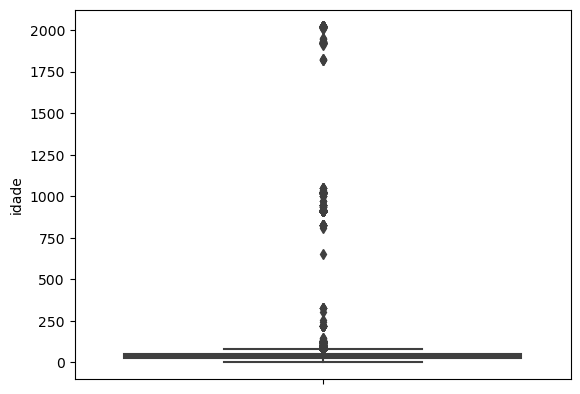

In [47]:
sns.boxplot(y='idade', data=df, orient="v")
plt.show()

Tratando os outliers da coluna idade

In [48]:
#Quantidade de valores acima de 100 anos
df.loc[df['idade'] > 100, 'idade'].shape[0]

1535

In [49]:
# Atribuindo o valor 37 (mediana), para as idades maiores que 100 anos
df.loc[df['idade'] > 100, 'idade'] = 37

In [50]:
# Verificando as mudanças
round(df['idade'].describe(), 2)

count    1542594.00
mean          38.20
std           15.13
min            0.00
25%           27.00
50%           37.00
75%           48.00
max          100.00
Name: idade, dtype: float64

In [51]:
# Acredito que o valor 0 possa representar recém-nascidos e crianças abaixo de 1 ano de idade
# Não necessariamente sendo valores incorretos
df.loc[df['idade'] == 0, 'idade'].count()

3092

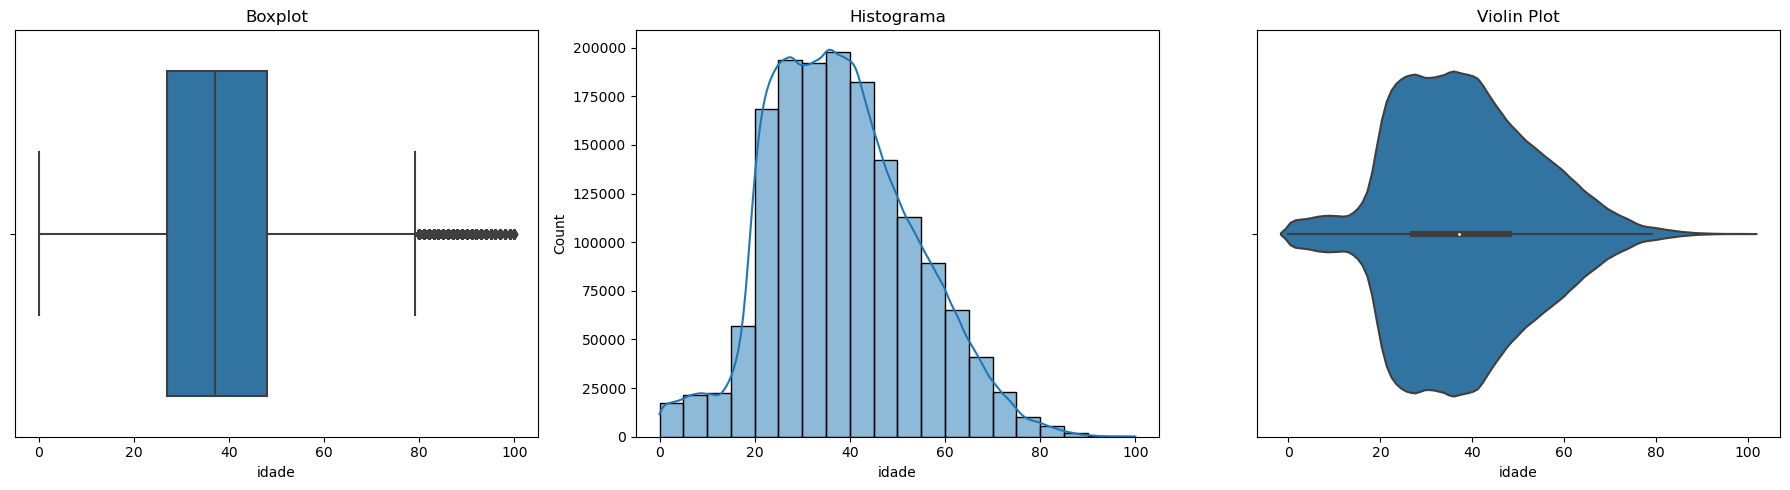

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='idade', ax=axs[0])
axs[0].set_title('Boxplot')

sns.histplot(data=df, x='idade', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histograma')

sns.violinplot(data=df, x='idade', ax=axs[2])
axs[2].set_title('Violin Plot')

plt.tight_layout()
plt.show()

In [53]:
# Preenchendo os valores ausentes na coluna 'idade' com uma amostra gerada a partir  da propria coluna idade

amostra_idades = np.random.choice(df.loc[df['idade'] > 0, 'idade'], size=df['idade'].isna().sum(), replace=True)

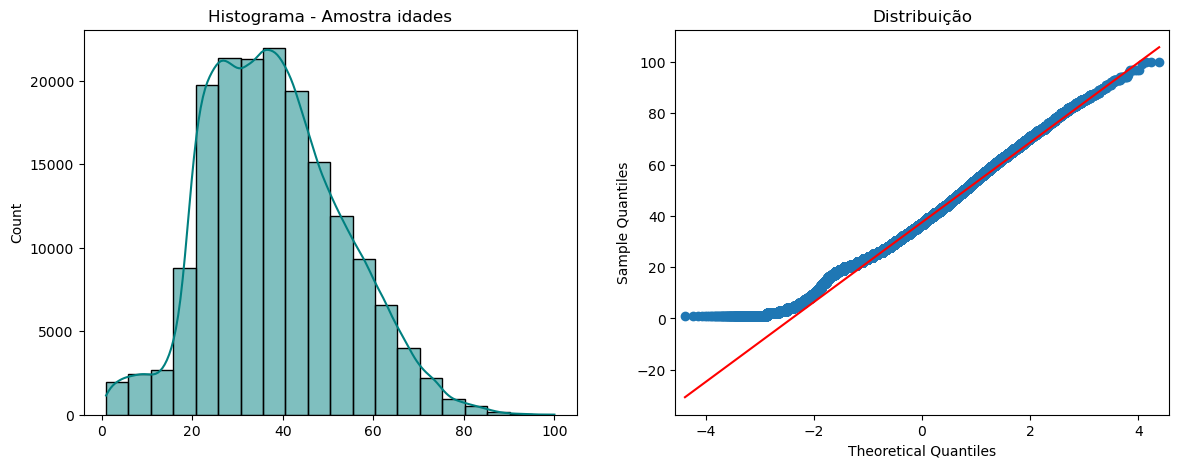

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(amostra_idades, bins=20, kde=True, color='teal', ax=axs[0])
axs[0].set_title("Histograma - Amostra idades")


sm.qqplot(amostra_idades, line ='q', ax=axs[1])
axs[1].set_title("Distribuição")

plt.show()

In [55]:
df.loc[df['idade'].isnull()].shape[0]

170294

In [56]:
amostra_idades.shape[0]

170294

In [57]:
df.loc[df['idade'].isnull(), 'idade'] = amostra_idades

In [58]:
# Transformando o tipo de dado da coluna idade em número inteiro
df['idade'] = df['idade'].astype(int)

**Coluna BR**

In [59]:
df['br'].value_counts()

br
116.0    247596
101.0    222187
40.0      85861
381.0     81705
163.0     71025
          ...  
265.0        14
437.0        10
342.0         4
475.0         2
477.0         2
Name: count, Length: 122, dtype: int64

In [60]:
# Verificando os valores onde a 'br' está vazia
df.loc[df['br'].isna(), ['br', 'municipio']]

,br,municipio
559,NaN,SABARA
4491,NaN,RIO DE JANEIRO
4492,NaN,RIO DE JANEIRO
4493,NaN,RIO DE JANEIRO
6402,NaN,SANTO ANTONIO DO LEVERGER
...,...,...
1708538,NaN,ELDORADO DO SUL
1708539,NaN,ELDORADO DO SUL
1708540,NaN,ELDORADO DO SUL
1708541,NaN,ELDORADO DO SUL


In [61]:
# Criando uma função moda para encontrar a moda da 'br' com base no municipio
# Essa função é necessaria pois há valores nulos na coluna

def moda(coluna):
    moda = coluna.mode()
    if len(moda) > 0:
        return moda.iloc[0]
    else:
        return None

In [62]:
# Escolhendo as colunas e aplicando a função

moda_br_municipio = df.groupby('municipio')['br'].agg(moda)
moda_br_municipio

municipio
ABADIA DE GOIAS     60.0
ABADIANIA           60.0
ABARE              116.0
ABEL FIGUEIREDO    222.0
ABRE CAMPO         262.0
                   ...  
XAPURI             317.0
XAXIM              282.0
XEXEU              101.0
XINGUARA           155.0
ZE DOCA            316.0
Name: br, Length: 1985, dtype: float64

In [63]:
# Aplicando a função

df['br'] = df.apply(lambda row: moda_br_municipio[row['municipio']] if pd.isna(row['br']) else row['br'], axis=1)

In [64]:
df.loc[df['br'].isna(), 'municipio'].unique()

array(['GALIA', 'SAO JOAO DO PIAUI', 'AGUA AZUL DO NORTE', 'PEROLA',
       'PALOTINA', 'SANTA CRUZ DO RIO PARDO', 'CAPIVARI DO SUL',
       'RUBINEIA', 'LAVRAS DO SUL', 'BODOQUENA', 'ALMEIRIM', 'URUPES',
       'CORONEL FREITAS', 'BOCA DA MATA', 'TERESINA DE GOIAS', 'TUCUMA',
       'ARAPIRACA', 'FRANCO DA ROCHA', 'GARRAFAO DO NORTE', 'FARROUPILHA',
       'AMETISTA DO SUL', 'TRAMANDAI', 'PORTO NACIONAL',
       'SAO FELIX DO XINGU'], dtype=object)

ainda sobram valores faltantes, utilizarei a coluna 'uf' como base agora

In [65]:
moda_br_uf = df.groupby('uf')['br'].agg(moda)

In [66]:
df['br'] = df.apply(lambda row: moda_br_uf[row['uf']] if pd.isna(row['br']) else row['br'], axis=1)

In [67]:
df['br'].isna().sum()

0

In [68]:
df['br'] = df['br'].astype(int)

**Coluna KM**

In [69]:
df['km'].value_counts()

km
2        6249
1        6173
3        6110
5        5698
4        4803
         ... 
942,9       1
642,2       1
698,3       1
769,1       1
868,2       1
Name: count, Length: 9352, dtype: int64

In [70]:
# Retirando o ponto flutuante da coluna 'km'

df['km'] = df['km'].str.split(',').str[0]

In [71]:
quantidade_km_nan = df['km'].isna().sum()
quantidade_km_nan

5781

In [72]:
df['km'] = df['km'].fillna(-1).astype(int)
df['km'] = df['km'].astype(int)

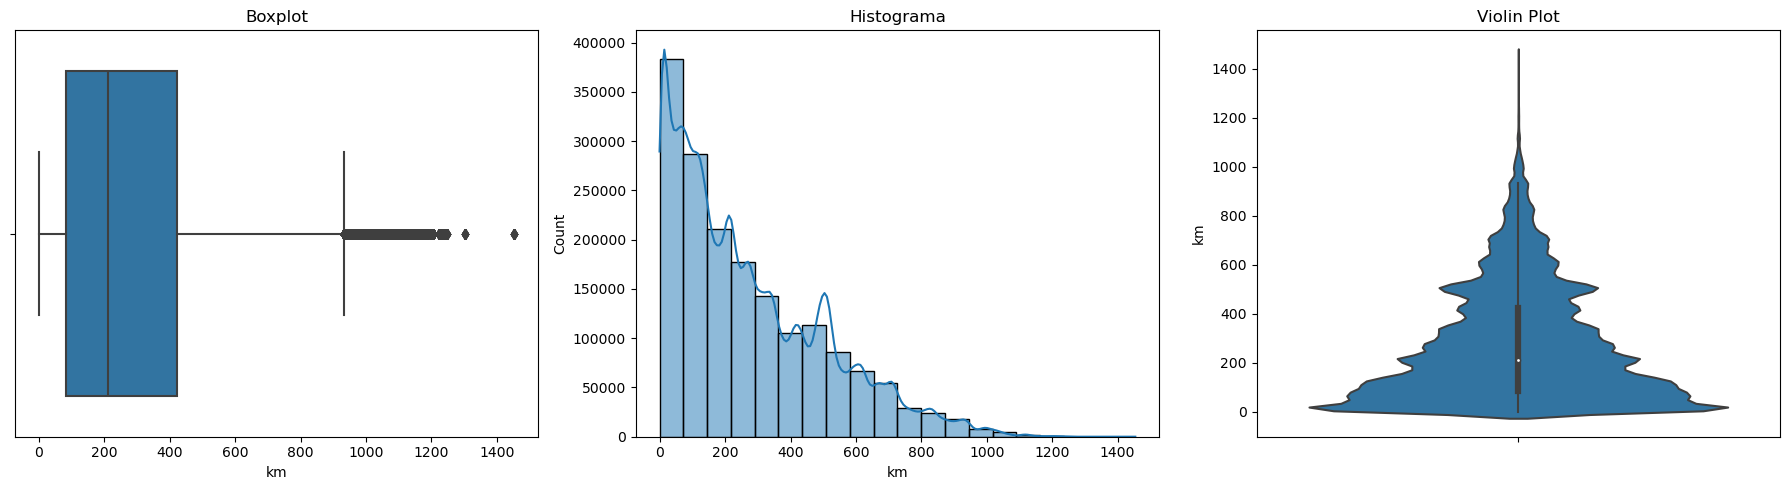

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='km', ax=axs[0])
axs[0].set_title('Boxplot')

sns.histplot(data=df, x='km', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histograma')

sns.violinplot(data=df, y='km', ax=axs[2], orient='v')
axs[2].set_title('Violin Plot')

plt.tight_layout()
plt.show()

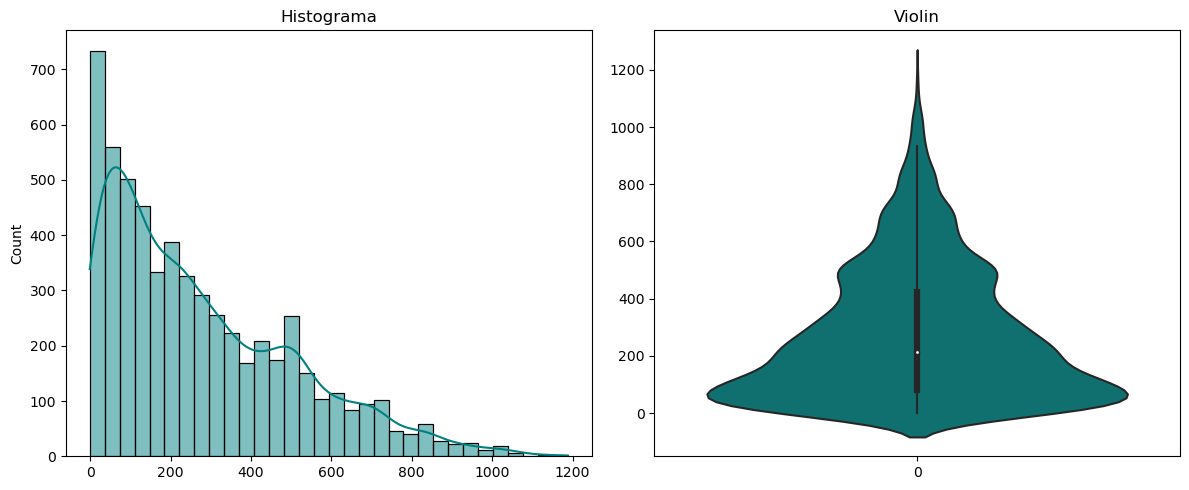

In [74]:
# Gerando uma amostra com base nos próprios dados da coluna km

amostra_km = np.random.choice(df['km'], size= quantidade_km_nan, replace=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(amostra_km, kde=True, color='teal', ax=axs[0])
axs[0].set_title('Histograma')

sns.violinplot(amostra_km, color='teal', ax=axs[1])
axs[1].set_title("Violin")

plt.tight_layout()
plt.show()

In [75]:
df.loc[df['km'] == -1, 'km'] = amostra_km

Ano de Fabricação

In [76]:
round(df['ano_fabricacao_veiculo'].describe(), 2)

count    1618511.00
mean        1923.22
std          411.81
min            0.00
25%         2007.00
50%         2012.00
75%         2017.00
max         2023.00
Name: ano_fabricacao_veiculo, dtype: float64

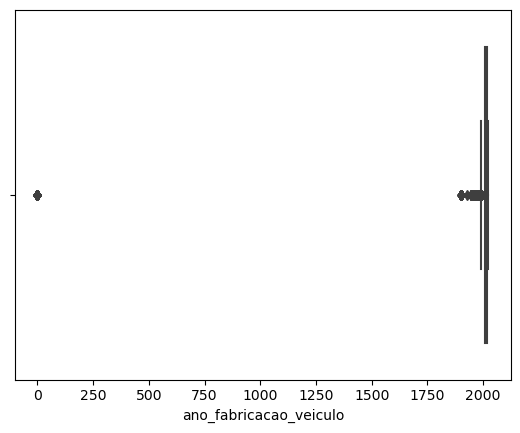

In [77]:
sns.boxplot(data=df, x='ano_fabricacao_veiculo')
plt.show()

Há presença de valores nulos, vazios e menores que 1900

In [78]:
df.loc[df['ano_fabricacao_veiculo'] <= 1950, 'ano_fabricacao_veiculo'].value_counts()

ano_fabricacao_veiculo
0.0       70931
1900.0      139
1946.0        8
1929.0        1
Name: count, dtype: int64

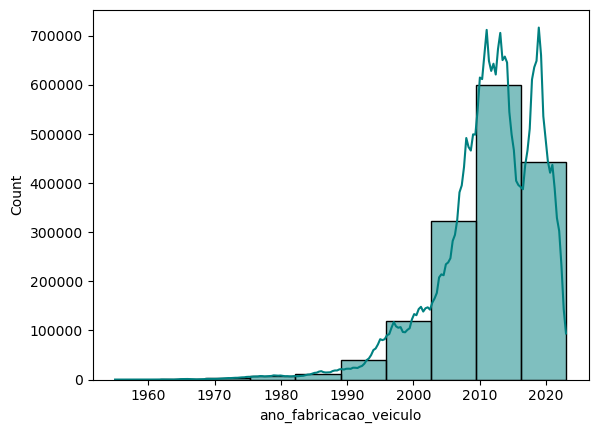

In [79]:
sns.histplot(data=df.loc[df['ano_fabricacao_veiculo'] >= 1950], x='ano_fabricacao_veiculo', bins=10, kde=True, color='teal')
plt.show()

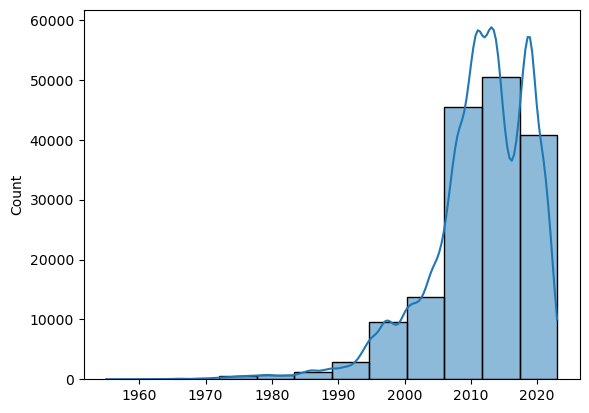

In [80]:
# Gerando uma amostra para a coluna ano_fabricacao_veiculo para os valores nulos e vazios

quantidade_fab0 = df.loc[df['ano_fabricacao_veiculo'] <= 1950].shape[0] + df['ano_fabricacao_veiculo'].isnull().sum()

df_filtrofab0 = df.loc[df['ano_fabricacao_veiculo'] > 1950, 'ano_fabricacao_veiculo']

amostra_fab = np.random.choice(df_filtrofab0, size=quantidade_fab0, replace=True)
sns.histplot(amostra_fab, bins=12, kde=True)
plt.show()

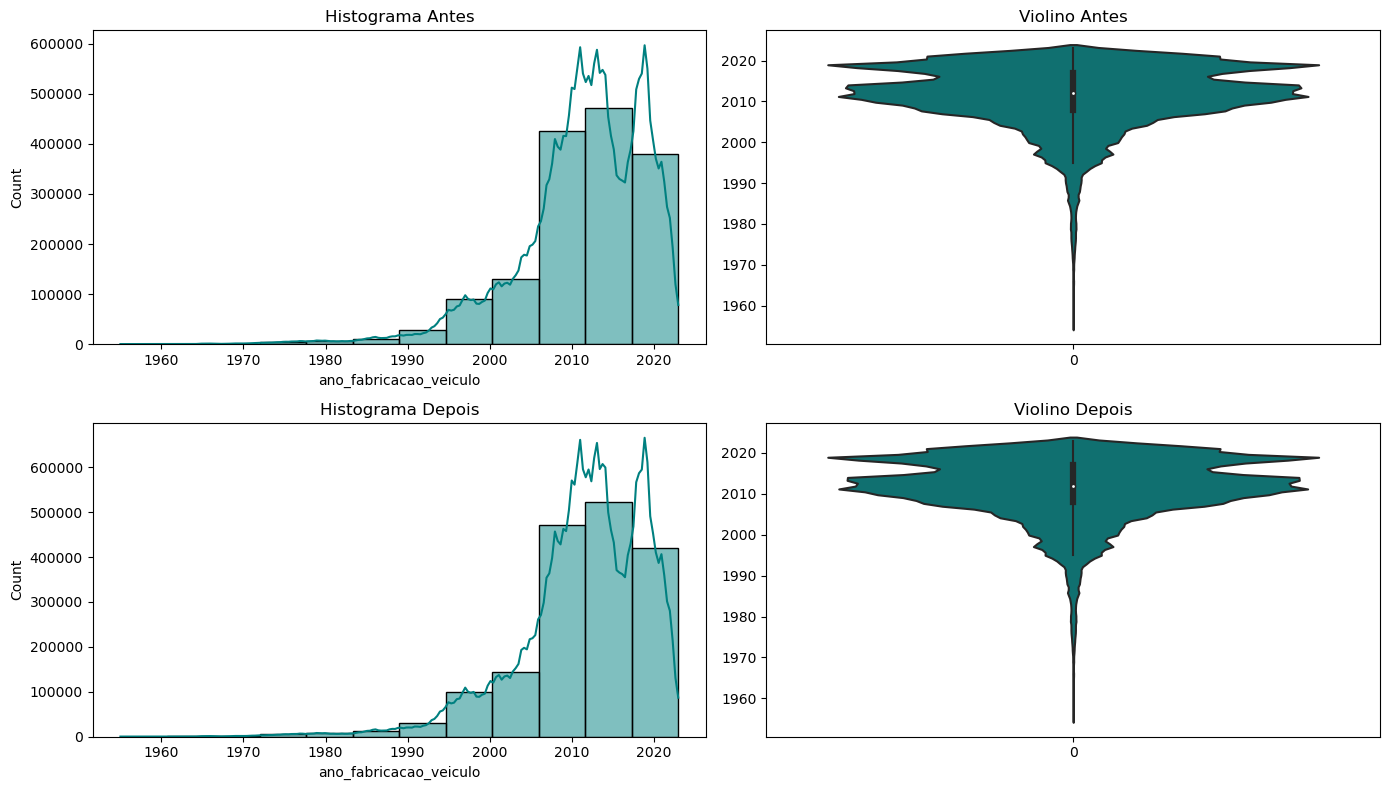

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sns.histplot(df_filtrofab0, ax=axs[0, 0], bins=12, color='teal', kde=True)
axs[0, 0].set_title('Histograma Antes')

sns.violinplot(df_filtrofab0, ax=axs[0, 1], color='teal')
axs[0, 1].set_title('Violino Antes')

# Substituindo os dados inconsistentes pela amostra gerada
df.loc[(df['ano_fabricacao_veiculo'].isna()) | (df['ano_fabricacao_veiculo'] <= 1950), 'ano_fabricacao_veiculo'] = amostra_fab

anofab = df['ano_fabricacao_veiculo']

sns.histplot(anofab, ax=axs[1, 0], bins=12, color='teal', kde=True)
axs[1, 0].set_title('Histograma Depois')

sns.violinplot(anofab, ax=axs[1, 1], color='teal')
axs[1, 1].set_title('Violino Depois')

plt.tight_layout()
plt.show()

In [82]:
df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].astype(int)

Delegacia

In [83]:
df['delegacia'].value_counts()

delegacia
DEL01-PR    72972
DEL01-MG    45984
DEL01-SC    35572
DEL04-SC    35195
DEL01-SP    30891
            ...  
DEL07-SP     2141
DEL12-RS     2026
DEL02-PI     1708
SEOP-RR        67
SEOP-AP        54
Name: count, Length: 153, dtype: int64

In [84]:
moda_delagacia_municipio = df.groupby('municipio')['delegacia'].agg(moda)
moda_delagacia_uf = df.groupby('uf')['delegacia'].agg(moda)

In [85]:
df['delegacia'] = df.apply(lambda row: moda_delagacia_municipio[row['municipio']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)
df['delegacia'] = df.apply(lambda row: moda_delagacia_uf[row['uf']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)

Foi observado anteriormente tipos de dados incorretos

In [86]:
df.dtypes[:20]

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                          int32
km                          int32
municipio                  object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo      int32
dtype: object

In [87]:
df.dtypes[20:]

tipo_envolvido    object
estado_fisico     object
idade              int32
sexo              object
ilesos             int64
feridos_leves      int64
feridos_graves     int64
mortos             int64
latitude          object
longitude         object
delegacia         object
dtype: object

O tipo object significa que pode haver dois ou mais tipos de dados misturados

***Formatando os tipos de dados***

**Coluna id**

In [88]:
df['id'].value_counts()

id
368980.0    2100
513470.0    1512
508740.0     990
404997.0     980
543737.0     900
            ... 
510016.0       1
280674.0       1
510018.0       1
510021.0       1
475115.0       1
Name: count, Length: 260480, dtype: int64

In [89]:
ids_mais_de_100 = df['id'].value_counts()[df['id'].value_counts() > 100].index
df[df['id'].isin(ids_mais_de_100)][:12]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,...,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia
1576,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,41,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1577,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,22,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1578,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,43,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1579,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,27,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1580,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,32,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1581,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,24,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1582,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,22,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1583,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Ileso,32,Masculino,1,0,0,0,"-19,95624622","-44,09843445",DEL01-MG
1584,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,63,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1585,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,37,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG


In [90]:
# Transformando o id em string e retirando o ponto flutuante

df['id'] = df['id'].astype(str)
df['id'] = df['id'].str.replace('.0', '')

# Anteriormente foi possivel observar id se repetindo mais de 100x
# o que não faz sentido, visto que é muito dificil um acidente afetar 200 pessoas diretamente

# Utilizarei os parâmetros idade, id e sexo para remover duplicações nos dados, como a distribuição das idades é proximo de uma normal
# a probabilidade de  um pessoas da mesma idade estiverem envolvidas

df = df.drop_duplicates(subset=['id', 'idade', 'sexo'])

In [91]:
# Verificando as alterações
df['id'].value_counts()

id
508740    128
568579    123
493258    122
481625    118
404997    118
         ... 
314515      1
500666      1
500664      1
500663      1
393388      1
Name: count, Length: 260480, dtype: int64

**Coluna data_inversa**

In [92]:
df['data_inversa'].value_counts()

data_inversa
2023-12-23    1054
2023-06-11     959
2023-07-23     944
2020-10-10     883
2023-12-15     876
              ... 
2020-03-28     209
2020-03-30     200
2020-03-25     182
2020-03-26     177
2020-03-23     170
Name: count, Length: 1461, dtype: int64

In [93]:
# Transformando em date_time
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

In [94]:
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S')

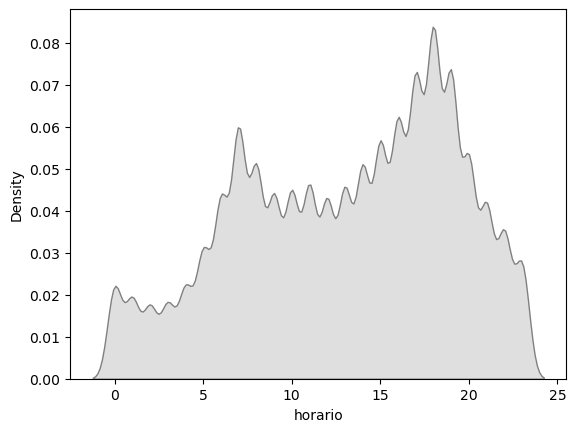

In [95]:
# Visualizando a distribuição dos valores pelas horas

sns.kdeplot(df['horario'].dt.hour, fill=True, color='gray')
plt.show()

In [96]:
# Observando o formato dos dados
df['horario'].value_counts()

horario
1900-01-01 19:00:00    10470
1900-01-01 18:30:00    10002
1900-01-01 18:00:00     9888
1900-01-01 17:00:00     8518
1900-01-01 17:30:00     8238
                       ...  
1900-01-01 02:59:00        3
1900-01-01 02:36:00        3
1900-01-01 01:54:00        2
1900-01-01 01:19:00        1
1900-01-01 01:17:00        1
Name: count, Length: 1438, dtype: int64

In [97]:
# Criando a coluna data_completa para juntar o horario e a data

df['data_completa'] = df['data_inversa'] + pd.to_timedelta(df['horario'].dt.strftime('%H:%M:%S'))
df['data_completa'].value_counts()

data_completa
2023-03-05 12:35:00    128
2023-12-17 18:15:00    123
2021-12-31 04:00:00    122
2022-12-16 18:30:00    122
2022-10-19 18:50:00    118
                      ... 
2023-06-10 07:50:00      1
2020-04-14 03:00:00      1
2020-02-02 22:05:00      1
2023-06-10 08:10:00      1
2022-01-17 05:05:00      1
Name: count, Length: 176821, dtype: int64

In [98]:
# Excluindo data_inversa e horario para ficar apenas a coluna com a data completa

df.drop(['data_inversa', 'horario'], axis=1, inplace=True)

**Coluna uf**

In [99]:
df['uf'].value_counts()

uf
MG    90832
PR    77455
SC    74543
RS    50546
RJ    47263
SP    47043
BA    39238
GO    35304
PE    30095
ES    23521
MT    23138
MS    18795
RO    17171
PB    17080
CE    16092
MA    14086
PI    13871
PA    13759
RN    13311
DF    10572
TO     7165
AL     5977
SE     5646
AC     2752
RR     2698
AP     2018
AM     1746
Name: count, dtype: int64

In [100]:
# Nenhuma anormalidade nos dados da coluna uf

df['uf'] = df['uf'].astype(str)

<Axes: ylabel='dia_semana'>

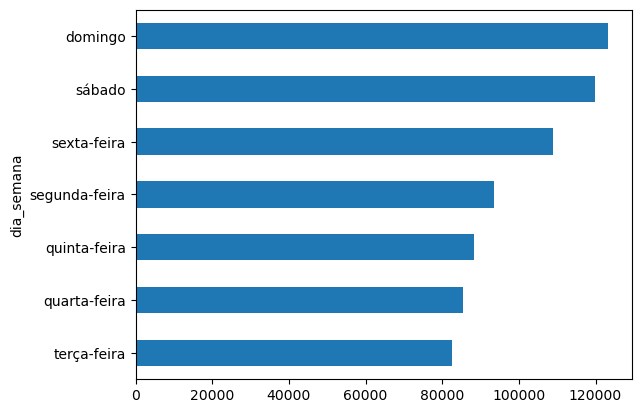

In [101]:
df['dia_semana'].value_counts(ascending=True).plot(kind="barh")

In [102]:
df['dia_semana'] = df['dia_semana'].astype(str)

**Coluna BR**

In [103]:
# Convertendo para string

df['br'] = 'BR-' + df['br'].astype(int).astype(str)

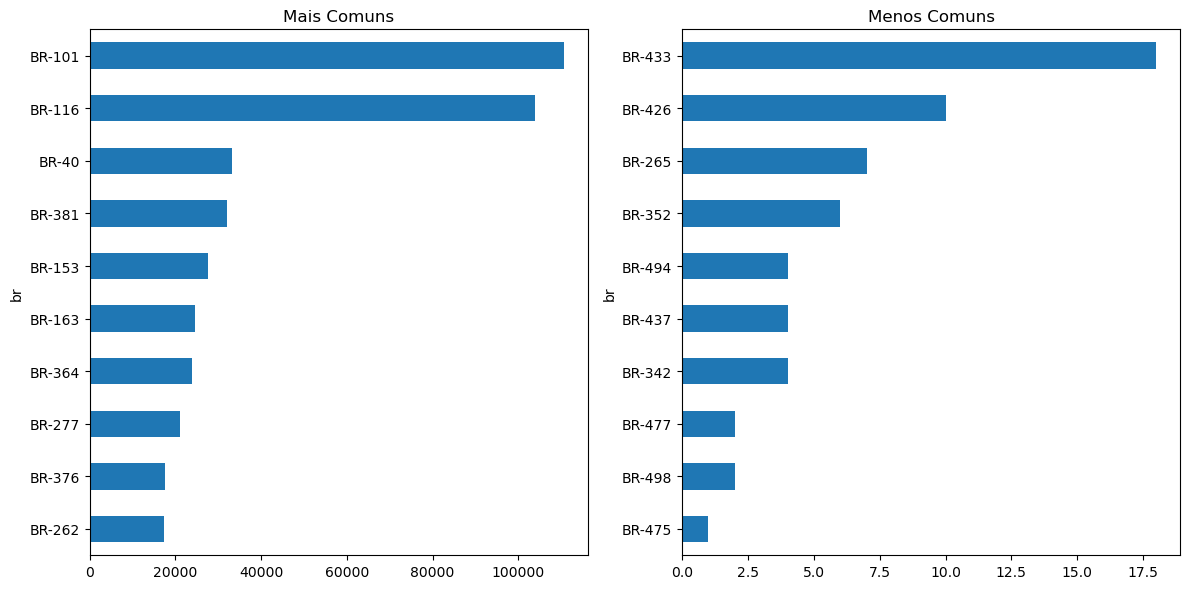

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df['br'].value_counts(ascending=True)[df["br"].unique().shape[0] - 10:].plot(kind="barh", ax=axs[0])
axs[0].set_title('Mais Comuns')

# Gráfico dos últimos 10 registros
df['br'].value_counts(ascending=True)[:10].plot(kind="barh", ax=axs[1])
axs[1].set_title('Menos Comuns')

plt.tight_layout()
plt.show()

In [105]:
df["municipio"].unique().shape[0]

1985

**Coluna municipio**

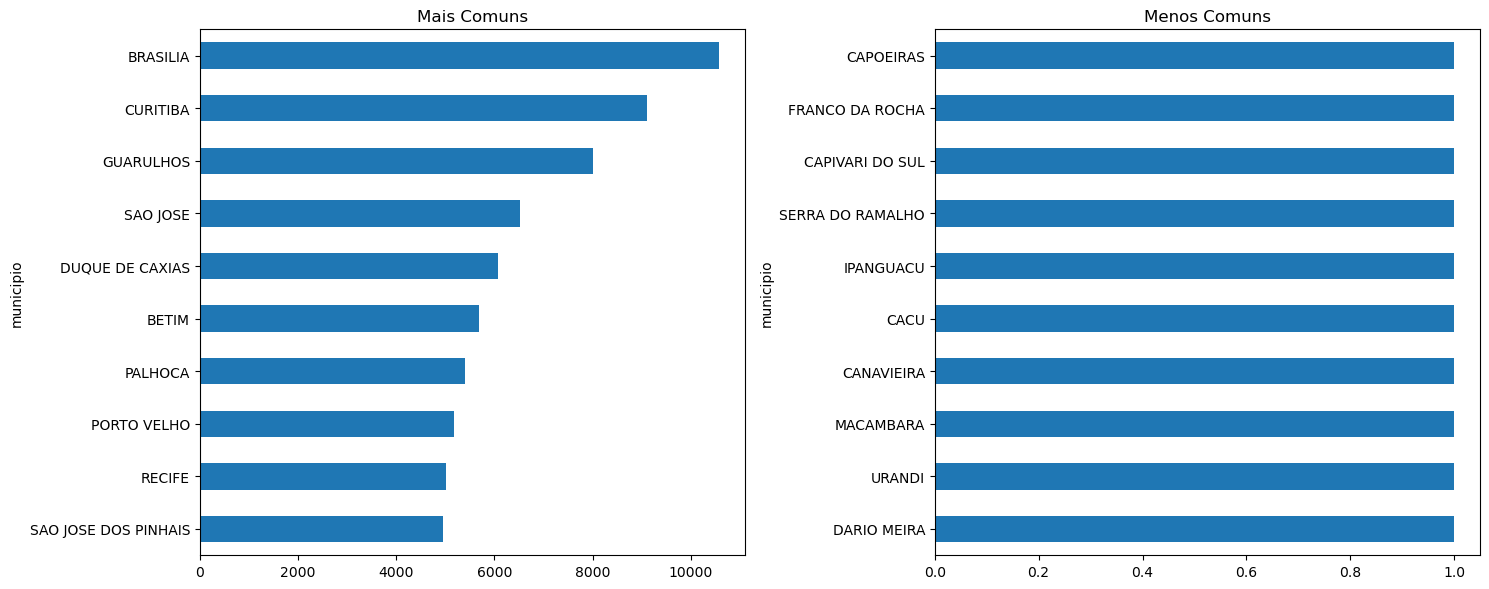

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df['municipio'].value_counts(ascending=True)[df["municipio"].unique().shape[0] - 10:].plot(kind="barh", ax=axs[0])
axs[0].set_title('Mais Comuns')

# Gráfico dos últimos 10 registros
df['municipio'].value_counts(ascending=True)[:10].plot(kind="barh", ax=axs[1])
axs[1].set_title('Menos Comuns')

plt.tight_layout()
plt.show()

**Coluna Causa_acidente**

In [107]:
df['causa_acidente'].value_counts()

causa_acidente
Reação tardia ou ineficiente do condutor                                         67716
Velocidade Incompatível                                                          62555
Ausência de reação do condutor                                                   56545
Falta de Atenção à Condução                                                      56090
Acessar a via sem observar a presença dos outros veículos                        44511
                                                                                 ...  
Sinalização encoberta                                                               77
Semáforo com defeito                                                                62
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       41
Obstrução Via tentativa Assalto                                                     34
Pedestre - Ingestão de álcool/ substâncias psicoativas                              17
Name: count, Length: 92, dty

**Ordem Tipo Acidente**

In [108]:
df['ordem_tipo_acidente'].value_counts()

ordem_tipo_acidente
1     492998
2     146415
3      50158
4       8908
5       2207
6        667
7        206
8        103
9         30
15        18
10         3
11         3
12         1
Name: count, dtype: int64

**Coluna Classificação Acidente**

<Axes: ylabel='classificacao_acidente'>

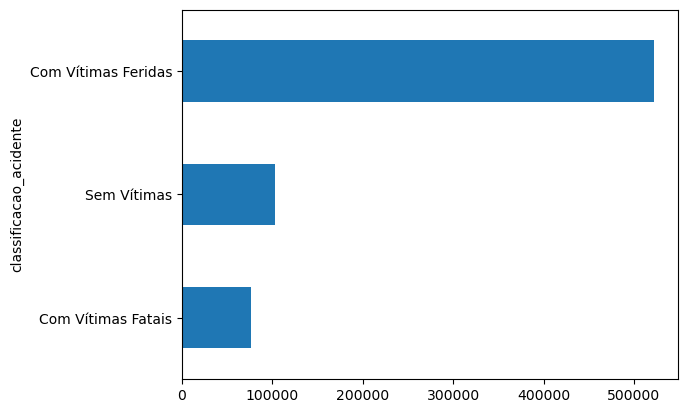

In [109]:
df['classificacao_acidente'].value_counts(ascending=True).plot(kind="barh")

**Coluna Fase Dia**

<Axes: ylabel='fase_dia'>

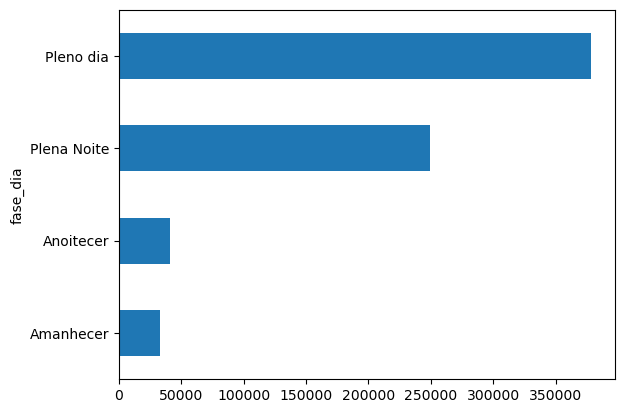

In [110]:
df['fase_dia'].value_counts(ascending=True).plot(kind="barh")

**Coluna Sentido Via**

<Axes: ylabel='count'>

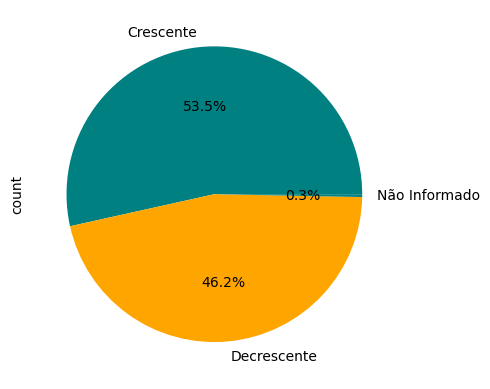

In [111]:
df['sentido_via'].value_counts().plot(kind="pie", colors=["teal", "orange"], autopct='%1.1f%%')


In [112]:
# Atribuindo a moda para o valor 'Não Informado'

df.loc[df['sentido_via'] == 'Não Informado', 'sentido_via'] = 'Crescente'

In [113]:
df['condicao_metereologica'].value_counts()

condicao_metereologica
Céu Claro           430046
Nublado             112324
Chuva                73253
Sol                  44951
Garoa/Chuvisco       24508
Ignorado              9409
Nevoeiro/Neblina      5875
Vento                 1279
Granizo                 36
Neve                    36
Name: count, dtype: int64

In [114]:
# Atribuindo a moda para o valor 'Ignorado'

df.loc[df['condicao_metereologica'] == 'Ignorado', 'condicao_metereologica'] = 'Céu Claro'

In [115]:
df['tipo_pista'].value_counts()

tipo_pista
Simples     364852
Dupla       276572
Múltipla     60293
Name: count, dtype: int64

In [116]:
df['tracado_via'].value_counts()[:20]

tracado_via
Reta                              418051
Curva                              87718
Interseção de Vias                 26895
Declive                            18235
Aclive                             15151
Reta;Declive                       13309
Rotatória                          10898
Reta;Aclive                        10867
Aclive;Reta                         9602
Curva;Declive                       9208
Declive;Reta                        9176
Retorno Regulamentado               6895
Declive;Curva                       6106
Reta;Interseção de Vias             5847
Curva;Aclive                        4686
Interseção de Vias;Reta             4344
Viaduto                             4088
Ponte                               3355
Aclive;Curva                        3243
Reta;Em Obras                       2688
Name: count, dtype: int64

In [117]:
# Verificando com mais detalhes os valores, pois achei estranho a presença do ';'

df['tracado_via'].unique()[:20]

array(['Reta', 'Curva', 'Reta;Interseção de Vias       ',
       'Declive;Curva                 ', 'Viaduto', 'Interseção de Vias',
       'Aclive;Reta                   ', 'Rotatória',
       'Curva;Declive                 ', 'Declive',
       'Reta;Declive                  ', 'Aclive',
       'Curva;Aclive                  ', 'Retorno Regulamentado',
       'Aclive;Curva                  ', 'Ponte;Reta;Declive            ',
       'Aclive;Viaduto;Curva          ', 'Declive;Reta                  ',
       'Viaduto;Reta;Interseção de Via', 'Reta;Aclive                   '],
      dtype=object)

In [118]:
# Separando os valores onde há ';' e pegando o primeiro valor do split com [0]

df['tracado_via'] = df['tracado_via'].str.split(';').str[0]

In [119]:
# Visualizando as alterações

df['tracado_via'].unique()

array(['Reta', 'Curva', 'Declive', 'Viaduto', 'Interseção de Vias',
       'Aclive', 'Rotatória', 'Retorno Regulamentado', 'Ponte',
       'Em Obras', 'Desvio Temporário', 'Túnel'], dtype=object)

**Coluna uso solo (Urbano ou Rural)**

<Axes: ylabel='count'>

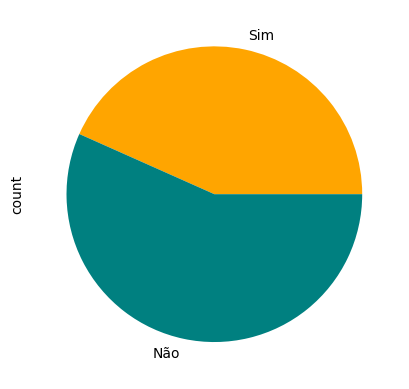

In [120]:
df['uso_solo'].value_counts(ascending=True).plot(kind="pie", colors=["orange", "teal"])

In [121]:
# Substituindo o valor 'sim' por urbano e 'Não' por rural
# Essas informações estão disponíveis no dicionário de dados da PRF

df['uso_solo'] = df['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [122]:
df['uso_solo'] = df['uso_solo'].astype(str)

**Coluna tipo veiculo**

In [123]:
df['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            279781
Motocicleta          124461
Caminhonete           59470
Não se aplica         53777
Caminhão-trator       52346
Caminhão              47899
Ônibus                23125
Motoneta              14111
Utilitário             9431
Bicicleta              8852
Camioneta              8411
Não Informado          8367
Micro-ônibus           4812
Outros                 3399
Ciclomotor             1627
Semireboque             779
Carroça-charrete        365
Trator de rodas         320
Reboque                 195
Triciclo                 66
Carro de mão             50
Trator misto             23
Trem-bonde               19
Trator de esteira        15
Quadriciclo               9
Chassi-plataforma         7
Name: count, dtype: int64

agrupando em categorias mais abrangentes


In [124]:
df['tipo_veiculo'] = df['tipo_veiculo'].replace(
    {'Motoneta': 'Motocicleta', 'Caminhão-trator': 'Caminhão', 'Camioneta': 'Camioneta/Caminhonete',
     'Caminhonete': 'Camioneta/Caminhonete', 'Micro-ônibus': 'Ônibus',
     'Trator de rodas': 'Trator', 'Trator misto': 'Trator', 'Trator de esteira': 'Trator',
     'Chassi-plataforma': 'Caminhão', 'Semireboque': 'Reboque'})

Investigando os valores onde o tipo de veiculo é Não Informado, Não se aplica, Utilitário
Utilizando o tipo de acidente como base

In [125]:
df.loc[df['tipo_veiculo'] == 'Não Informado', ['tipo_acidente']].value_counts()

tipo_acidente                 
Colisão traseira                  1589
Saída de leito carroçável         1135
Colisão transversal                955
Colisão com objeto                 717
Capotamento                        671
Colisão lateral mesmo sentido      592
Colisão frontal                    584
Engavetamento                      482
Tombamento                         431
Queda de ocupante de veículo       391
Incêndio                           250
Colisão lateral sentido oposto     224
Atropelamento de Pedestre          199
Atropelamento de Animal             99
Eventos atípicos                    37
Derramamento de carga               10
Colisão com objeto estático          1
Name: count, dtype: int64

In [126]:
df.loc[df['tipo_veiculo'] == 'Não se aplica', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          15196
Queda de ocupante de veículo        6215
Tombamento                          6115
Saída de leito carroçável           5360
Colisão traseira                    3990
Colisão com objeto                  3062
Colisão transversal                 3018
Colisão frontal                     2943
Capotamento                         2207
Colisão lateral mesmo sentido       1681
Colisão com objeto estático          831
Colisão lateral                      798
Colisão lateral sentido oposto       575
Derramamento de carga                511
Incêndio                             313
Atropelamento de Animal              309
Engavetamento                        268
Eventos atípicos                     254
Danos eventuais                       68
Colisão com objeto em movimento       63
Name: count, dtype: int64

In [127]:
df.loc[df['tipo_veiculo'] == 'Utilitário', ['tipo_acidente']].value_counts()

tipo_acidente                  
Colisão traseira                   1856
Saída de leito carroçável          1247
Colisão transversal                1036
Capotamento                         746
Colisão com objeto                  737
Colisão lateral mesmo sentido       685
Colisão frontal                     669
Tombamento                          466
Engavetamento                       461
Queda de ocupante de veículo        324
Colisão lateral sentido oposto      220
Colisão com objeto estático         218
Atropelamento de Pedestre           206
Colisão lateral                     186
Atropelamento de Animal             156
Incêndio                            104
Eventos atípicos                     56
Danos eventuais                      28
Derramamento de carga                26
Colisão com objeto em movimento       4
Name: count, dtype: int64

In [128]:
df.loc[df['tipo_veiculo'] == 'Outros', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          1024
Colisão traseira                    567
Queda de ocupante de veículo        498
Tombamento                          396
Colisão lateral mesmo sentido       142
Saída de leito carroçável           138
Colisão transversal                 117
Colisão frontal                     113
Colisão com objeto                  113
Colisão lateral                     109
Capotamento                          36
Colisão lateral sentido oposto       34
Engavetamento                        24
Colisão com objeto estático          23
Eventos atípicos                     23
Atropelamento de Animal              13
Derramamento de carga                 9
Colisão com objeto em movimento       7
Incêndio                              7
Danos eventuais                       6
Name: count, dtype: int64

In [129]:
# Atribuindo o tipo de veiculo como Pedestre para os acidente que a o tipo foi Atropelamento

filtro = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não informado', 'Outros']) & (df['tipo_acidente'] == 'Atropelamento de Pedestre')]
df.loc[filtro.index, 'tipo_veiculo'] = 'Pedestre'

Gerando uma amostra com base no dados para substituir as inconsistências

In [130]:
tamanho_veiculos_aleatorios = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'].shape[0]
veiculos_aleatorios = np.random.choice(df['tipo_veiculo'], size=tamanho_veiculos_aleatorios, replace=True)

while (veiculos_aleatorios == 'Utilitário').any() or (veiculos_aleatorios == 'Não se aplica').any() or (veiculos_aleatorios == 'Não Informado').any() or (veiculos_aleatorios == 'Outros').any() or (veiculos_aleatorios == 'Pedestre').any():
    indices = np.where((veiculos_aleatorios == 'Utilitário') | (veiculos_aleatorios == 'Não se aplica') | (veiculos_aleatorios == 'Não Informado') | (veiculos_aleatorios == 'Outros') | (veiculos_aleatorios == 'Pedestre'))
    veiculos_aleatorios[indices] = np.random.choice(df['tipo_veiculo'], size=len(indices))
pd.DataFrame(veiculos_aleatorios).value_counts()

Automóvel                29441
Motocicleta              11518
Caminhão                  8473
Camioneta/Caminhonete     5748
Ônibus                    2336
Bicicleta                  723
Ciclomotor                 150
Reboque                     71
Carroça-charrete            40
Trator                      32
Carro de mão                 8
Triciclo                     4
Quadriciclo                  3
Trem-bonde                   1
Name: count, dtype: int64

In [131]:
# Substituindo com base na amostra

df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'] = veiculos_aleatorios

In [132]:
df['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor         474306
Passageiro       173634
Testemunha        38928
Pedestre          14700
Cavaleiro           148
Não Informado         1
Name: count, dtype: int64

In [133]:
# Atribuindo a moda para o valor 'Não Informado'

df.loc[df['tipo_envolvido'] == 'Não Informado', 'tipo_envolvido'] = 'Condutor'

In [134]:
df.loc[(df['tipo_envolvido'] == 'Testemunha')]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
58,260046,quarta-feira,SC,BR-282,509,XANXERE,Animais na Pista,1,Saída de leito carroçável,Com Vítimas Feridas,...,76,Não Informado,0,0,0,0,"-26,89436315","-52,4613905",DEL07-SC,2020-01-01 02:15:00
164,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,20,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
327,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,1,Saída de leito carroçável,Com Vítimas Feridas,...,33,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
328,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,2,Capotamento,Com Vítimas Feridas,...,36,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
329,260139,quarta-feira,MT,BR-163,729,SORRISO,Fenômenos da Natureza,1,Saída de leito carroçável,Com Vítimas Feridas,...,38,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712110,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,3,Colisão traseira,Com Vítimas Feridas,...,15,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712112,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,3,Colisão traseira,Com Vítimas Feridas,...,28,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712117,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,40,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712118,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,25,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00


In [135]:
# É possivel observar que todas as testemunhas não possuem sexos e não estão envolvidas de fato no acidente
# Cavaleiro e a pessoa que estava andando com animais

df.loc[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].shape[0]

38928

In [136]:
df = df.drop(df[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].index)

**Coluna estado fisico**

In [137]:
df['estado_fisico'].value_counts()

estado_fisico
Ileso            268859
Lesões Leves     225147
Lesões Graves     74334
Não Informado     71344
Óbito             23105
Name: count, dtype: int64

 ***Investigando os valores 'Não Informado'***

In [138]:
df.loc[df['estado_fisico'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,33,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,45,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,53,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,37,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,32,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712835,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,56,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,27,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,52,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,27,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [139]:
# Atribuindo o valor 'Ileso' para os acidentes onde não houveram vítimas

df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Sem Vítimas'), 'estado_fisico'] = 'Ileso'

Filtrando e observando os dados onde o estado fisico é não informado e a classificação é com vítimas fatais

In [140]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), ['id', 'estado_fisico','tipo_acidente', 'classificacao_acidente', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]

,id,estado_fisico,tipo_acidente,classificacao_acidente,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
599,260213,Não Informado,Tombamento,Com Vítimas Fatais,45,Não Informado,0,0,0,0
601,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,40,Não Informado,0,0,0,0
603,260213,Não Informado,Tombamento,Com Vítimas Fatais,43,Não Informado,0,0,0,0
605,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,32,Não Informado,0,0,0,0
2688,260652,Não Informado,Colisão frontal,Com Vítimas Fatais,36,Não Informado,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1712575,586160,Não Informado,Tombamento,Com Vítimas Fatais,50,Não Informado,0,0,0,0
1712577,586160,Não Informado,Colisão lateral sentido oposto,Com Vítimas Fatais,56,Não Informado,0,0,0,0
1712586,586507,Não Informado,Atropelamento de Pedestre,Com Vítimas Fatais,64,Não Informado,0,0,0,0
1712873,589229,Não Informado,Colisão lateral mesmo sentido,Com Vítimas Fatais,27,Não Informado,0,0,0,0


Criando uma amostra referente ao filtro anterior

In [141]:
# Não necessariamente estar envolvido em acidente com mortes significa que todos os envolvidos morreram,
# Porém a probabilidade do acidente ser mais violento é alta
# Utilizei uma probabilidade de 40% para ser óbito, 35% para Lesões graves e 25% para lesões leves

tamanho = df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais')].shape[0]
probabilidades = [0.65, 0.25, 0.1]
estados_fisicos = np.random.choice(['Óbito', 'Lesões Graves', 'Lesões Leves'], size=tamanho, p=probabilidades)

In [142]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'estado_fisico'] = estados_fisicos

In [143]:
# Para o restante dos dados que não estavam presentes em nenhum dos filtros anteriores

tamanho = df.loc[df['estado_fisico'] == 'Não Informado'].shape[0]
probabilidades = [0.5, 0.3, 0.2]
estados_fisicos2 = np.random.choice(['Lesões Leves', 'Ileso', 'Lesões Graves'], size=tamanho, p=probabilidades)

In [144]:
df.loc[df['estado_fisico'] == 'Não Informado', 'estado_fisico'] = estados_fisicos2

In [145]:
# Verificando a mudança

df['estado_fisico'].value_counts()

estado_fisico
Ileso            302966
Lesões Leves     245694
Lesões Graves     84604
Óbito             29525
Name: count, dtype: int64

**Coluna sexo**

In [146]:
df['sexo'].value_counts()

sexo
Masculino        443930
Feminino         143118
Não Informado     71344
Ignorado           4397
Name: count, dtype: int64

***Explorando os dados com sexo 'Não Informado' e 'Ignorado'***

In [147]:
df.loc[df['sexo'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,33,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,45,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,53,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,37,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,32,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712835,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,56,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,27,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,52,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,27,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [148]:
df.loc[df['sexo'] == 'Ignorado'][:5]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
10,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Ingestão de Álcool,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,34,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
12,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Falta de Atenção do Pedestre,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,38,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
231,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,2,Colisão com objeto estático,Com Vítimas Feridas,...,38,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
232,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,1,Colisão traseira,Com Vítimas Feridas,...,56,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
233,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Velocidade Incompatível,2,Colisão com objeto estático,Com Vítimas Feridas,...,44,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00


Gerando uma amostra para a coluna sexo com base nos dados originais

In [149]:
quantidade_sexo = df.loc[(df['sexo'] == 'Ignorado') | (df['sexo'] == 'Não Informado')].shape[0]
df_sexo_fil = df.loc[df['sexo'].isin(['Masculino', 'Feminino'])]
tamanho_sexo = df_sexo_fil.shape[0]

tamanho_masculino = df_sexo_fil['sexo'].eq('Masculino').sum()
tamanho_feminino = df_sexo_fil['sexo'].eq('Feminino').sum()

probabilidades_sexo = [tamanho_masculino / tamanho_sexo, tamanho_feminino / tamanho_sexo]

sexo_aleatorio = np.random.choice(['Masculino', 'Feminino'], p=probabilidades_sexo, size=quantidade_sexo)
pd.DataFrame(sexo_aleatorio).value_counts()

Masculino    57232
Feminino     18509
Name: count, dtype: int64

In [150]:
df.loc[(df['sexo'] == 'Não Informado') | (df['sexo'] == 'Ignorado'), 'sexo'] = sexo_aleatorio

Explorando as colunas 'ilesos', 'feridos_leves', 'feridos_graves' em conjunto

In [151]:
print(df['ilesos'].value_counts(), end='\n\n')
print(df['feridos_leves'].value_counts(), end='\n\n')
print(df['feridos_graves'].value_counts())

ilesos
0    393930
1    268859
Name: count, dtype: int64

feridos_leves
0    437642
1    225147
Name: count, dtype: int64

feridos_graves
0    588455
1     74334
Name: count, dtype: int64


In [152]:
# Uma pessoa deve estar presente em pelo menos umas das colunas

total_registrados = df.loc[df['ilesos'] == 1].shape[0] + df.loc[df['feridos_leves'] == 1].shape[0] + df.loc[df['feridos_graves'] == 1].shape[0] + df.loc[df['mortos'] == 1].shape[0]

print('Total envolvidos: ', df.shape[0])
print('Total Registrado:', total_registrados)
print('Total Faltantes:', df.shape[0] - total_registrados)

Total envolvidos:  662789
Total Registrado: 591445
Total Faltantes: 71344


In [153]:
# Observando os faltantes

faltantes = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
faltantes

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,33,Masculino,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,45,Masculino,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,53,Masculino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,37,Feminino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,32,Masculino,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712835,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,56,Masculino,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,27,Feminino,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,52,Masculino,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,27,Masculino,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [154]:
# Atribuindo o valor 1 na coluna 'ilesos' nos acidentes onde não há presença de vítimas

df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0) & (df['classificacao_acidente'] == 'Sem Vítimas'), 'ilesos'] = 1

Com base no filtro, encontrar a probabilidade de estar em um acidente com vítimas fatais e a vítimas morrer (1)
Depois preencher as colunas com base na amostra gerada

In [155]:
filtro_mortos = df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos']

tamanho_mortos = filtro_mortos.shape[0]
probabilidade_morte = df.loc[df['mortos'] == 1].shape[0] / (df.loc[df['classificacao_acidente'] == 'Com Vítimas Fatais'].shape[0] - tamanho_mortos)

array_mortes = np.random.choice([0, 1], size=tamanho_mortos, p=[1 - probabilidade_morte, probabilidade_morte], replace=True)


df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos'] = array_mortes

print('Probabilidade de morte: ', probabilidade_morte, ' | Numero total da amostra: ', filtro_mortos.shape[0])

Probabilidade de morte:  0.41085781350024897  | Numero total da amostra:  9895


Criando uma função para preencher os registro faltantes

atribuindo maiores chances de lesões leves em acidentes apenas com vitimas feridas, e em acidentes com vitimas fatais, maiores chances de lesões graves

In [156]:
def preencher_registros(df):
    for index, row in df.iterrows():
        if row['classificacao_acidente'] == 'Com Vítimas Feridas':
            # Definir feridos_leves com 1 com 70% de chance
            df.at[index, 'feridos_leves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            
            # Com bases nos valores 0 gerados anteriormente, preenchendo com 1 a coluna feridos_graves
            df.at[index, 'feridos_graves'] = 1 if df.at[index, 'feridos_leves'] == 0 else 0
        
        elif row['classificacao_acidente'] == 'Com Vítimas Fatais':
            
            # Definir feridos_graves com 1 com 70% de chance
            df.at[index, 'feridos_graves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            
            # Com bases nos valores 0 gerados anteriormente, preenchendo com 1 a coluna feridos_leves
            df.at[index, 'feridos_leves'] = 1 if df.at[index, 'feridos_graves'] == 0 else 0
        
        else:
            # Se não for especificado, preencher com 1 na coluna 'ilesos'
            df.at[index, 'ilesos'] = 1
    
    return df

df_filtered = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
df_filtered = preencher_registros(df_filtered)
df.update(df_filtered)

**Adicionando a coluna região**

In [157]:
def adicionar_coluna_regiao(df):
    # Dicionário de mapeamento de UF para região
    regiao_por_uf = {
        'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
        'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
        'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
        'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
        'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
        'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
    }
    
    # Adicionando a coluna 'região' com base na coluna 'uf'
    df['regiao'] = df['uf'].map(regiao_por_uf)
    
    return df

df = adicionar_coluna_regiao(df)

#### Criando um dataframe com os dados sumarizados

In [158]:
df.loc[df['sexo'] == 'Masculino', 'sexo'] = 'Fem'
df.loc[df['sexo'] == 'Feminino', 'sexo'] = 'Mas'

def contar_sexo(sexos):
    contagem_masculino = (sexos == 'Mas').sum()
    contagem_feminino = (sexos == 'Fem').sum()
    return f"{contagem_masculino} masculino, {contagem_feminino} feminino"


def contar_tipo(tipos):
    contagem_condutor = (tipos == 'Condutor').sum()
    contagem_passageiro = (tipos == 'Passageiro').sum()
    contagem_pedestre = (tipos == 'Pedestre').sum()
    return f"{contagem_condutor} C, {contagem_passageiro} Pass, {contagem_pedestre} Ped"

aggregation_functions = {
    'sexo': contar_sexo, 
    'idade': lambda x: ','.join(map(str, x)),
    'ilesos': 'sum',
    'feridos_graves': 'sum',
    'feridos_leves': 'sum',
    'mortos': 'sum', 
    'tipo_envolvido': contar_tipo
}

# Agrupar por 'id' e aplicar as funções de agregação
df_agregado = df.groupby('id').agg(aggregation_functions).reset_index()

# Gerar um novo DataFrame com as colunas não processadas
colunas_restantes = df.columns.difference(list(aggregation_functions.keys()) + ['id']) 
df_restante = df.groupby('id')[colunas_restantes.tolist()].first().reset_index() 

# Combinar os DataFrames agregados e não processados com base no ID
df_final = pd.merge(df_agregado, df_restante, on='id')
df_final.head()

,id,sexo,idade,ilesos,feridos_graves,feridos_leves,mortos,tipo_envolvido,ano_fabricacao_veiculo,br,...,municipio,ordem_tipo_acidente,regiao,sentido_via,tipo_acidente,tipo_pista,tipo_veiculo,tracado_via,uf,uso_solo
0,260031,"3 masculino, 2 feminino","33,18,20,16,17",0,5,0,0,"1 C, 4 Pass, 0 Ped",2012,BR-153,...,GURUPI,1,Norte,Crescente,Atropelamento de Animal,Simples,Automóvel,Reta,TO,Rural
1,260036,"0 masculino, 4 feminino","34,36,38,25",2,0,0,2,"2 C, 0 Pass, 2 Ped",2019,BR-116,...,NOVA IGUACU,1,Sudeste,Decrescente,Atropelamento de Pedestre,Dupla,Pedestre,Reta,RJ,Urbano
2,260037,"0 masculino, 2 feminino","50,33",1,0,1,0,"2 C, 0 Pass, 0 Ped",2010,BR-101,...,SAO JOSE,1,Sul,Crescente,Colisão lateral,Simples,Automóvel,Reta,SC,Urbano
3,260038,"0 masculino, 1 feminino",16,0,1,0,0,"1 C, 0 Pass, 0 Ped",2009,BR-364,...,CACOAL,3,Norte,Decrescente,Tombamento,Simples,Motocicleta,Reta,RO,Urbano
4,260039,"2 masculino, 3 feminino","22,30,19,37,61",0,4,1,0,"0 C, 5 Pass, 0 Ped",2015,BR-153,...,REBOUCAS,1,Sul,Crescente,Capotamento,Simples,Automóvel,Curva,PR,Rural


In [159]:
df_final.drop(['ordem_tipo_acidente'], axis=1, inplace=True)

Dividindo e salvando o arquivo

In [160]:
tamanho_parte = len(df_final) // 4

# Dividir o DataFrame em 4 partes
parte1 = df_final.iloc[:tamanho_parte]
parte2 = df_final.iloc[tamanho_parte:2*tamanho_parte]
parte3 = df_final.iloc[2*tamanho_parte:3*tamanho_parte]
parte4 = df_final.iloc[3*tamanho_parte:]

parte1.to_csv('dados_prf_parte1.txt', sep=';', index=False)
parte2.to_csv('dados_prf_parte2.txt', sep=';', index=False)
parte3.to_csv('dados_prf_parte3.txt', sep=';', index=False)
parte4.to_csv('dados_prf_parte4.txt', sep=';', index=False)